# Deep learning with Python (Keras)

Todo el presente código esta bastante basado en "Deep Learning with Python" de Francoise Chollet. Referencia obligatoria.

![prueba1](https://scontent.fccp1-1.fna.fbcdn.net/v/t1.0-9/23472974_1168891499879134_580845037082950682_n.jpg?_nc_cat=102&ccb=2&_nc_sid=8bfeb9&_nc_ohc=epr-UlosOT0AX_Cs2OO&_nc_ht=scontent.fccp1-1.fna&oh=9996dfd335f87bc47132049a64c850d4&oe=5FBC7EE8)

# Cap 2

## Hello World en Deep Learning

In [ ]:
#hello world in deep learning

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(len(train_labels))
print(train_labels)
print("----------------------------------------")
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
----------------------------------------
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [ ]:
from keras import models
from keras import layers 

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) #flitro de los datos
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) # "" es distinto a ''

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255


from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2535 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0681 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0376 - accuracy: 0.9884


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0771 - accuracy: 0.9773
test_acc 0.9772999882698059


## Representacion de datos en redes neuronales: Pruebas sobre el ejemplo anterior

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


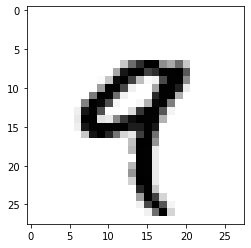

In [ ]:
#display a digit
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [ ]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)
myslice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)
myslice= train_images[:, 14:, 14:]
print(myslice.shape)

(90, 28, 28)
(90, 28, 28)
(60000, 14, 14)


In [ ]:
#batch = train_images(128 * n:128 *(n +1))
batch = train_images[:128]
batch = train_images[128:256]

Object `assert` not found.


# 3 Iniciando con redes neuronales

## 3.1 Anatomia de una red neuronal

NOTAS:
- *Layers*, combinadas en una *network*.
- *input data*, que corresponden a *targets*.
- La *loss function*, que define la señal de realimentacion usada para aprendisaje.
- El *optimizer*, el cual determina como procedera el aprendizaje.

PASOS PARA EL ALGORITMO:
- Definir los datos a utilizar para entrenar: tensores de entrada y tensores objetivo.

- Definir red con capas (elegir el modelo) que mapea las entradas a los objetivos.
- Configurar el proceso de aprendisaje: elegir una funcion de costo, un optimizador y alguna metrica a monitorear.

- Iterar sobre los datos. 

In [ ]:
from keras import layers
layer = layers.Dense(32, input_shape = (784, 1)) # una layer con 32 salidas

In [ ]:
from keras import models
from keras import layers

model = models.Sequential() #solo para capas lineales
model.add(layers.Dense(32, activation='relu',input_shape=(784,)))
model.add(layers.Dense(32, activation='softmax')) #automaticamente se le asigna el shape correcto

In [ ]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [ ]:
from keras import optimizers

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [ ]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=15)

NameError: ignored

## 3.4 Clasificador de criticas de peliculas



CONTEXTO: Clasificacion de dos clases. En este caso, buscamos clasificar como positiva y negativa una reseña.

Usaremos el package IMDB. En el, las revisiones (secuencias de palabras) se han convertido en secuencias de números enteros, donde cada número entero representa una palabra específica en un diccionario.

Note:
- Separamos conjuntos de datos para entrenar y otros para prueba. (¿por qué?: Memorizacion!)


Con $\text{num_words}=10000$ usaremos las 10000 palabras que mas se repiten del dataset. Note que:

 - Las variables train_data y test_data son listas de revisiones; cada revisión es una lista de índices de palabras (que codifican una secuencia de palabras) 
 - En train_labels se guarda si la reseña es buena (=1) o mala (=0).


 En el siguiente codigo, inicializaremos las variables.

In [ ]:
#cargamos el dataset IMDB: https://www.imdb.com/interfaces/
from keras.datasets import imdb
import numpy as np

#listas de las criticas - cargamos datos de entrenamiento y de pruebas
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(np.shape(train_data[0]))
print(train_labels[0])
print('----------------------------')
print(train_data[1])
print(np.shape(train_data[1]))
print(train_labels[1])
print('----------------------------')
print(train_data[2])
print(np.shape(train_data[2]))
print(train_labels[2])
print('----------------------------')
print(train_data[500])
print(np.shape(train_data[500]))
print(train_labels[500])

max([max(sequence) for sequence in train_data])

17465344/17464789 [==============================] - 1s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

9999

El numero de palabras tomadas es de 10000 por reseña. De esta manera, los indices de cualquier vector no pueden superar 10000.

Podemos decodificar las palabras de la siguiente manera (algo que nos provee IMDB):

In [ ]:
word_index = imdb.get_word_index() #diccionario, numero ->>>> palabra 

#mapeo indices enteros a palabras
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
#decodificacion (esto es propio de la libreria)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

Para entender la decodificacion de palabras podemos visitar la referencia 4 (nada mas es trascendente para lo mostrado hasta ahora).

PREPARAMOS LOS DATOS

Normalizamos las listas a un largo comun, de acuerdo a la siguiente idea: Creamos un vector v de 10000x1. Si tenemos los numeros [3,5,7], luego de aplicar nuestra super transformacion vectorize_sequences obtendremos solo 0s en todos los indices de nuestro vector v, menos en los indices 3, 5 y 7, que seran 1s.

In [ ]:
import numpy as np

#one hot encoding - evitamos disorciones de relacion de orden -embedding
#hint: normalizar por dimension

def vectorize_sequences(sequences, dimension=10000):
    #creamos una matriz de puros ceros con (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # seteamos a 1 los indices que corresponden a la secuencia de numeros
    return results

# pasamos el train data por la transformacion
x_train = vectorize_sequences(train_data)
# junto con el test data
x_test = vectorize_sequences(test_data)

print(x_train[0])
print(x_train[0].shape)

[0. 1. 1. ... 0. 0. 0.]
(10000,)


Todo regalon. Hacemos la misma gracia vectorizando las etiquetas (*labels*):

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train.shape, "  ", y_test.shape)

(25000,)    (25000,)


CONSTRUYENDO LA RED Y CONFIGURANDO SU ARQUITECTURA

Notas:
- *Dense*: pila de capas completamente conectadas. Defina el número de unidades por capa.

- *Dense* define: salida = activacion( $W \cdot$ entrada $+ b$ )

- *Hidden units*(unidades ocultas) : cuanta libertad está permitiendo que la red tenga cuando aprende representaciones internas (complejidad $\alpha$ costo_computo) (complejidad $\alpha$ sobreaprendizaje).

- ReLu: elimina valores negativos.

- Sigmoide: transformacion para interpretar el algo como una probabilidad.

- Sequential: Un modelo secuencial es apropiado para una pila simple de capas donde cada capa tiene exactamente un tensor de entrada y un tensor de salida.
(otros: Functional) (vea referencia 7 para mayor detalle)

Esquema de la red:

![modelo red](https://camo.githubusercontent.com/ad8a581c483ced840d4a471329d8654e41883d79/68747470733a2f2f73332e616d617a6f6e6177732e636f6d2f626f6f6b2e6b657261732e696f2f696d672f6368332f335f6c617965725f6e6574776f726b2e706e67)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential() #eleccion del modelo
model.add(layers.Dense(128, activation='relu', input_shape=(10000,))) #capa1
model.add(layers.Dense(128, activation='relu')) #capa2
model.add(layers.Dense(128, activation='relu')) #capa3
model.add(layers.Dense(128, activation='relu')) #capa4

#single-unit layer + sigmoid = salida es una probabilidad
model.add(layers.Dense(1, activation='sigmoid')) #probabilidad de que la revision sea un 1



In [ ]:
model.summary()

#print(np.shape(train_data[0]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 1,329,793
Trainable params: 1,329,793
Non-trainable params: 0
_________________________________________________________________


![modelo red2](https://i.stack.imgur.com/iHW2o.jpg)

ELECCION DE LA FUNCION DE COSTO Y EL ALG. OPTIMIZADOR:

Definiciones:

- Backprop : forma algorítmica en la que enviamos el resultado de algún cálculo al padre de forma recursiva.

- Optimizador: calcula la pérdida en alguna función que tenemos que optimizar. Nos dará el error entre la suposición y las respuestas correctas (perdida o *loss*)

- Relacion: La pérdida se calcula mediante el cálculo de la función de optimización de RMSprop. Esto nos dará un $\Delta$ por el cual nuestros valores actuales en *weights* $W$ y en *bias* $b$ tienen que cambiar. Un paso de backprop es cuando calculamos ese $\Delta$ y lo usamos para actualizar los valores de $W$ y $b$.




> Definicion de optimizador:
El optimizador es un hiperparametro que define la convergencia de la funcion de costo, a grandes rasgos. Existen varias opciones de optimizadores. Actualmente conocemos SGD: lo que buscaba era actualizar los *weights* y los *biases*, para acercarnos paulatinamente al valor optimo. Lo ideal era acercarnos cada vez mas al valor del minimo global en la funcion de costo. 

![convexa](https://miro.medium.com/max/700/0*xSet2JDUg_6oRVnq.jpg)

>Problemas: a veces la funcion de costo no era convexa y las cosas no salian tan bonitas. En la siguiente imagen tenemos dos minimos (-locales-). Para no caer en el minimo local que no sera el global, tenemos que controlar correctamente el learning rate, usar un SGD con momentum (mas parametros complicados para setear), usar el algoritmo RMSprop, etc.

![Google's logo](https://miro.medium.com/max/560/0*G8a4jCsMLJ7xNQNt.png)

>SGD con momentum: restringe la oscilacion en una direccion del SGD para ayudarle a converger mas rapido. Con ello, podemos utilizar un *learning rate* mas grande.

![Google's logo](https://miro.medium.com/max/522/1*3TtUK5Tjceo2mU0huq663w.png)

>RMSprop Optimizer: Idea similar a la anterior: restringe las oscilaciones en la dirección vertical. Por lo tanto, podemos aumentar nuestra tasa de aprendizaje y nuestro algoritmo podría dar pasos más grandes en la dirección horizontal convergiendo más rápido. El valor del impulso sera $\beta$ (generalmente =0,9). Para evitar que los gradientes exploten, se incluye un parámetro $\epsilon$ en el denominador que se establece en un valor pequeño. Note que en vez de considerar un valor uniforme para todos los pesos, se mantiene un factor de entrenamiento específico para cada uno de ellos.

![Google's logo](https://miro.medium.com/max/524/1*m_PC8M4y9UKYU9JNuOC9Jw.png)

Tipos de optimizadores:

SG
- SGD
- Batch GD
- Mini-Batch GD

Adaptativos:
- RMSprop
- Adam
- ...

![Google's logo](https://miro.medium.com/max/620/0*o9jCrrX4umP7cTBA)

![Google's logo](https://miro.medium.com/max/620/0*e_iUb1lSX4NSzrcw)



COMPILAR EL MODELO

Para este caso, se **inicializarán los siguientes parametros**:
- Problema binario + salida es una probabilidad = usar la funcion de costo ***binary_crossentropy*** (podria usar otra como *mean_squared_error*) [ **log_loss** =$-(y\log(p) + (1 - y)\log(1 - p))$]. [Vea ref 8]

- ***rmsprop*** (root mean square propagation): seleccion del algoritmo que actuará sobre la funcion de costo elegida.

- **Metrics = *accuracy***. Una métrica es una función que se utiliza para juzgar el rendimiento de el modelo elegido. Calcula la frecuencia con la que las predicciones son iguales a las etiquetas. depende del problema


Este sera el bosquejo del modelo elegido: (podemos pasarle los modelos directamente escritos como texto ya que son parte de keras)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

CONFIGURACION DEL OPTIMIZADOR, FUNCION DE PERDIDA, METRICAS

Si queremos una configuracion personalizada de cada uno de los parametros, esto se logra pasando al modelo una instancia de el objeto a presonalizar con un argumento de configuracion dado:



In [ ]:
from keras import optimizers

#ejemplo para ocupar objetos: mas informacion de esta configuracion en la referencia
model.compile(optimizer=optimizers.RMSprop(lr=0.001), #objeto optimizer, aqui especificamos explicitamente el learning rate
              loss=losses.binary_crossentropy,  #objeto funcion de perdida
              metrics=[metrics.binary_accuracy] #objeto de medida de la metrica
              )
#nota: no usaremos esto, mejor usar los parametros predeterimandos por keras

CONJUNTO DE VALIDACION

Monitorear durante el entrenamiento la precision con datos que nunca se han visto.


In [ ]:
#valores de x validacion, entrenamiento
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

#valores de y validacion, entrenamiento
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Y entrenamos el modelo. Haremos 20 iteraciones sobre todas las muestras en los tensores *x_train* e *y_train*, en minilotes de 512 muestras.

Nota:

- model.fit() retorna un objeto *History*. Este entrega informacion sobre que sucedio durante el entrenamiento. Entregara 4 objetos: uno por metrica monitoreda.

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512, #SGD
                    validation_data=(x_val, y_val)) #controlar la perdida y la precision

Epoch 1/20
30/30 [==============================] - 3s 98ms/step - loss: 0.5283 - accuracy: 0.7613 - val_loss: 0.3086 - val_accuracy: 0.8820
Epoch 2/20
30/30 [==============================] - 3s 84ms/step - loss: 0.2653 - accuracy: 0.8992 - val_loss: 0.2845 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 3s 84ms/step - loss: 0.1796 - accuracy: 0.9319 - val_loss: 0.4484 - val_accuracy: 0.8274
Epoch 4/20
30/30 [==============================] - 3s 83ms/step - loss: 0.1245 - accuracy: 0.9535 - val_loss: 0.3592 - val_accuracy: 0.8833
Epoch 5/20
30/30 [==============================] - 3s 84ms/step - loss: 0.0780 - accuracy: 0.9743 - val_loss: 0.5276 - val_accuracy: 0.8609
Epoch 6/20
30/30 [==============================] - 3s 86ms/step - loss: 0.0959 - accuracy: 0.9745 - val_loss: 0.3552 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 3s 85ms/step - loss: 0.0094 - accuracy: 0.9985 - val_loss: 0.6283 - val_accuracy: 0.8819
Epoch 8/20
30

ENTRENAMIENTO Y VALIDACION DE LA PERDIDA(*TRAINING AND VALIDATION LOSS*), ENTRENAMIENTO Y VALIDACION DE LA PRECISION (*TRAINING AND VALIDATION ACCURACY*)

Aqui:

- Los puntos: pérdida y precisión del entrenamiento.

- Las lineas: pérdida y precisión de la validación.


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

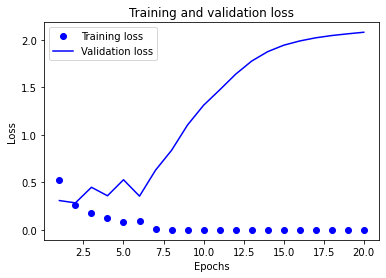

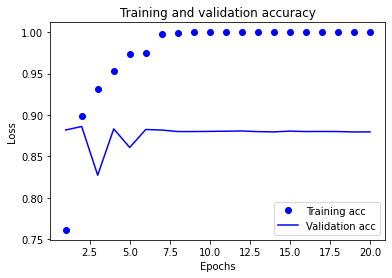

In [ ]:
#aqui graficaremos los objetos que nos entrega history
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# En primer lugar graficamos el 
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Note:

- ***training loss*** disminuye con cada epoca, ***training accuracy*** aumenta con cada epoca (eso lo buscamos).


Pero aquí hay un problema grave: con los datos de prueba, hacer muchas epocas está empeorando el rendimiento de prediccion. 

- ***validation loss***: minimo valor entre la 3era y 4ta epoca. Luego aumenta de manera lineal (eso no lo buscamos!) ***validation accuracy***: máximo valor en aproximadamente la 4ta epoca, luego decrece lentamente de manera lineal (eso tampoco lo buscamos!)

ATENCION: un modelo que funcione bien para los datos de entrenamiento no siempre se adaptará bien a los datos de prueba. No se estaría generalizando el modelo, sino adaptandose a los datos de entrenamiento. (*overfitting*)

In [ ]:
results = model.evaluate(x_test, y_test) #evaluar el modelo entrenado con datos de prueba
print("test loss, test acc:", results)

782/782 [==============================] - 2s 3ms/step - loss: 2.2524 - accuracy: 0.8658
test loss, test acc: [2.2524349689483643, 0.8658000230789185]


De la grafica vemos que mas lo mejor es parar de entrenar en la 3era-4ta epoca. Hay tecnicas para mitigar este problema de forma mas inteligente pero eso es mas mundo.

In [ ]:
#hacemos lo mismo que antes pero esta vez haremos 4 epocas
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 30ms/step - loss: 0.4752 - accuracy: 0.8220
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2758 - accuracy: 0.9047
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2095 - accuracy: 0.9247
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2899 - accuracy: 0.8850


In [ ]:
#results
print("test loss, test acc:", results)


[0.2898564338684082, 0.8849599957466125]

Accuracy: 88% (aproximadamente). Estado del Arte:95%.

Teniendo la red entrenada, podemos usarla de manera practica: podemos mostrar la probabilidad de que las reseñas sean positivas usando el metodo *predict*.

Note:
- Confiable para algunas muestras: 0,99>  - 0,01< - ... (clara clasificacion)
- Cuestionable para algunos casos:  0,6?? - 0,4?? - ... (red indecisa)

In [ ]:
# Generar/Mostrar predicciones (probabilidades -- la salida de la ultima capa)
# debe usar datos de testeo no usados para entrenar
model.predict(x_test[0])

#print("Generate predictions for 3 samples")
#predictions = model.predict(x_test[:3])
#print("predictions shape:", predictions.shape)

array([[0.2771025 ],
       [0.9997492 ],
       [0.79391575],
       ...,
       [0.10114253],
       [0.07046226],
       [0.64251757]], dtype=float32)

## Referencias:
1. Introduccion a optimizadores: https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b

1. Github Francois Chollet: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

1. Descripcion de optimizadores y sus parametros: https://faroit.com/keras-docs/2.0.8/optimizers/

1. IMBD: http://ai.stanford.edu/~amaas/data/sentiment/

1. https://medium.com/coinmonks/backpropagation-concept-explained-in-5-levels-of-difficulty-8b220a939db5

1. Un algoritmo hecho desde 0, sin utilizar keras, solo numpy: https://zhenye-na.github.io/2018/09/09/build-neural-network-with-mnist-from-scratch.html

1. Eleccion de modelo: Sequential, Functional, Otros: https://keras.rstudio.com/articles/about_keras_models.html

1. Referencia sobre la eleccion de la funcion de costo: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

1. Framework para visualizar el entrenamiento (Buenisimo para la intuicion visual, recomendado): https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8,8,8,8,8,8&seed=0.37266&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=regression&initZero=false&hideText=false

1. Una demostración visual de que esta arquitectura puede modelar cualquier función: http://neuralnetworksanddeeplearning.com/chap4.html

1. Regularizacion: Un resumen inteligente https://elvex.ugr.es/decsai/deep-learning/slides/NN5%20Regularization.pdf

## 3.5 Classifying newswires: a multiclass classification example


In [ ]:
# pendiente

## 3.6 Predicting house prices: a regression example



Referencia: página 180 del Chollet.

*tokens*: unidades en las que se puede dividir el texto (palabras, caracteres, n-gramas).

*n-gramas*: 

In [ ]:
from keras.datasets import boston_housing

# 5 DL for CV

## 5.1 Intro to Convnets

Usaremos una CNN para clasificar digitos MNIST.

Tomaremos un tensor de entrada de tamaño: *(image_height, image_width , image_channels)*.

Aquí, configuraremos la red para procesar entradas de tamaño: *(28, 28, 1)*, formato de las imágenes MNIST. Pasaremos como argumento entonces a la primera capa: *input_shape=(28, 28, 1)*.

In [ ]:
from keras import layers
from keras import models

#pequeña red CNN
#ventanas de aprendizaje en la vecindad local de las capas Conv2D: 3x3
model = models.Sequential()

#depth=32, size_patches=3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


Propiedades interesantes que ya hemos conversado:
- Patrones aprendidos invariantes a la traslación.
- Puede aprender patrones de jerarquia espacial.

![compartido](https://drive.google.com/uc?export=view&id=1yiRjrhbEmaWABxbHFVsQ_FHO7FoMS4oc)

El mundo visual forma una jerarquía espacial visual: los bordes hiperlocales se combinan en objetos locales como los ojos
o orejas, que se combinan en conceptos de alto nivel como "gato".


Mostraremos la arquitectura de la red:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Conv2D_12: toma un mapa de características de tamaño (28,28, 1) y genera un mapa de características de tamaño (26, 26, 32): calcula 32 filtros sobre su entrada. Cada uno de estos 32 canales de salida contiene una cuadrícula de valores de 26 × 26, que es un *response map* del filtro sobre la entrada, que indica la respuesta de ese patrón de filtro en diferentes ubicaciones de la entrada.

Salida de *Conv2D* y *MaxPooling2D*: tensor 3D de tamaño *(height, width, channels)*. El último tensor de salida de tamaño *(3,3,64)* se lo entregamos a una capa completamente conectada: *Dense*.

> Convoluciones estan definidas por dos parámetros claves:
- El tamaño de los parches extraidos de las entradas: tipico 3x3, 5x5.
- Profundida de la salida del *feature map*: numero de filtro.


In [ ]:
model.add(layers.Flatten()) #aplanador 3D -> 1D
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #última capa de clasificación con las 10 opciones

Contar los parámetros:

El número de parámetros para una *Conv2D layer* esta dada por:

    (kernel_height * kernel_width * input_channels * output_channels) + (output_channels if bias is used).


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1982528   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 2,038,922
Trainable params: 2,038,922
Non-trainable params: 0
______________________________________________

Efecto del borde y Padding

Considere un mapa de características de 5 × 5 (25 cuadritos en total). Solo hay 9 cuadritos alrededor de los cuales puede centrar una ventana de 3 × 3, formando una cuadrícula de 3 × 3 (ver imagen siguiente). Por lo tanto, el *feature map* de salida será 3 × 3. 

Se encoge un poco: exactamente dos mosaicos junto a cada dimensión, en este caso. Puede ver este efecto de borde en acción en el ejemplo anterior: comienza con entradas de 28 × 28, que se convierten en 26 × 26 después de la primera capa de convolución.


![compartido](https://drive.google.com/uc?export=view&id=1gfnznASW7JAZLk0IzIoS7SwR7Nt18_Dw)

Si desea obtener un mapa de características de salida con las mismas dimensiones espaciales que la entrada, puede usar *padding*. 

*Padding*: agregar un número apropiado de filas y columnas en cada lado del mapa de características de entrada para que sea posible ajustar las ventanas de convolución central alrededor de cada mosaico de entrada. Para una ventana de 3 × 3, agrega una columna a la derecha, una columna a la izquierda, una fila en la parte superior y una fila en la parte inferior. Para una ventana de 5 × 5, agrega dos filas.

![compartido](https://drive.google.com/uc?export=view&id=1IjICYrsMW6LXu0owa5CE_MRwQnNx9gUf)

En las capas *Conv2D*, *padding* se puede configurar mediante un argumento en la función de *padding*.

- "valid": no hay relleno (solo se utilizarán ubicaciones de ventana válidas). - "same": rellenar de tal manera que tenga una salida con el mismo ancho
y la altura de la entrada entrada ". 

El argumento de *padding* predeterminado es "valid".

Reutilizamos el código de MNIST que ya hemos visto.

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 303s 323ms/step - loss: 0.1244 - accuracy: 0.9626
Epoch 2/5
938/938 [==============================] - 311s 332ms/step - loss: 0.0393 - accuracy: 0.9886
Epoch 3/5
938/938 [==============================] - 305s 325ms/step - loss: 0.0270 - accuracy: 0.9919
Epoch 4/5
938/938 [==============================] - 305s 325ms/step - loss: 0.0200 - accuracy: 0.9941
Epoch 5/5
938/938 [==============================] - 305s 325ms/step - loss: 0.0148 - accuracy: 0.9957


Evaluación del modelo:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 13s 43ms/step - loss: 0.0401 - accuracy: 0.9895


In [ ]:
test_acc

0.9894999861717224

Mas conceptos:

> STRIDES (pasos)

El otro factor que puede influir en el tamaño de la producción es la noción de *strides*. La descripción de la convolución hasta ahora ha supuesto que las pixeles centrales de las ventanas de convolución son todas contiguas. Pero la distancia entre dos ventanas sucesivas es un parámetro de la convolución llamado *stride*, que por defecto es 1 (y puede ser mayor). 

 En la figura siguiente, puede ver los parches extraídos por un Convolución 3× 3 con *stride*=2 sobre una entrada de 5×5 (sin *padding*).

![compartido](https://drive.google.com/uc?export=view&id=1uJUJan9j1wcXAiMVtGNmvMfh9R8w8O-1)



El ancho y la altura del mapa de características se reducen en un factor de 2 (además de los cambios inducidos por los efectos de borde). 

En la práctica: rara vez se utilizan.

Para reducir la resolución de los *feature map* tendemos a usar la operación de *max-pooling*.

*Max-pooling*

Consiste en extraer ventanas de los *feature maps* de entrada y retornar el valor máximo de cada canal. Es conceptualmente similar a la convolución, excepto que en lugar de transformar los parches locales mediante una transformación lineal aprendida (el kernel de convolución), se transforman mediante una operación de tensor *max tensor operation*. 

Una gran diferencia con la convolución es que *max-pooling* generalmente se realiza con ventanas 2×2 y *stride* 2, para reducir la resolución de los mapas de características en un factor de 2.

Por otro lado, la convolución generalmente se realiza con ventanas de 3×3 y sin *stride* (paso 1).

PREGUNTAR: que sucede si quito las capas Max-pooling?

## 5.2 Entrenar una CNN desde 0 con un pequeño conjunto de datos

- Entrenar un modelo de clasificación de imágenes utilizando muy pocos datos es muy común. (cientos a decenas de miles)

- Este ejemplo: clasificar imágenes de gatos y perros. El dataset contiene 25000 fotos de perros y gatos. En especifico son 12500 de perros y 12500 de gatos.

- Usaremos 1000 para entrenar, y 1000 de validación para cada caso.

- Idealmente aplicaremos varias técnicas para afinar y conseguir mejores preciciones: usar una red preentrenada, o usar una técnica llamada *data argumentation*.

- Cuanto es muchas muestras para que funcione el entrenamiento?: relativo.

- Los modelos entrenados son reutilizables, o a lo sumo, ejecutando pequeños cambios.

- La corona en Computer Vision en datos de entrenamiento es modelos entrenados usando ImageNet como datos de entrenamiento.


PRIMER PASO: EL DATASET

Usaremos como datos imagenes que nos entrega www.kaggle.com

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_IPD440_Codes_S2_2020_ItaloSalgado/Cats_and_Dogs/test1.zip'

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/55

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Machine_Learning_IPD440_Codes_S2_2020_ItaloSalgado/Cats_and_Dogs/train.zip'

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/do

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
original_dataset_dir = "/content/cat_and_dogs"

In [ ]:
import os, shutil
# The directory where we will
# store our smaller dataset
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

In [ ]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [ ]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Gatos:

In [ ]:
# Copy first 1000 cat images to train_cats_dir
#/content/cats_and_dogs/train
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join("/content/cats_and_dogs/train" , fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join("/content/cats_and_dogs/train", fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join("/content/cats_and_dogs/train", fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

Perros:

In [ ]:
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join("/content/cats_and_dogs/train", fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join("/content/cats_and_dogs/train", fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join("/content/cats_and_dogs/train", fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Chequeo de que todo esta OK

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500


In [ ]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training dog images: 1000
total validation dog images: 500
total test dog images: 500


Construir la red

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


PREPROCESADO DE LOS DATOS

- Los datos deben formatearse en tensores de punto flotante preprocesados de manera adecuada antes de ingresarlos a la red.

- Tenemos muchos JPEG.

Así, lo que se hará es:

- Leer los archivos de imagen, decodificar el contenido JPEG en cuadriculas de pixeles RGB.

- Convertirlos en **tensores de punto flotante**.

- Cambiar la escala de los valores de los pixeles (entre 0 y 255)->(0,1).

Maravilla: alguien ya se dio el trabajo de crear una libreria para preprocesar imágenes para keras. 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# reescalado de 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory, que guardamos al inicio
        train_dir,
        # cambiaremos el tamaño de todas las imagenes a 150x150
        target_size=(150, 150),
        batch_size=20,
        # usaremos binary_crossentropy loss, necesitamos binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        #idem a lo anterior
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Aqui se usaron generadores: producen lotes de imágenes RGB de 150 × 150 (forma (20, 150, 150, 3)) y etiquetas binarias (forma (20,)). Hay 20 muestras en cada lote definido por el *batch_size*. Tenga en cuenta que el generador produce estos lotes de forma indefinida: recorre sin cesar las imágenes de la carpeta de destino. Por esta razón, debe romper el ciclo de iteración en algún momento.

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


**Ajustemos el modelo a los datos** usando un generador. 

Usamos el método fit_generator (deprecated?).
 
Espera como primer argumento un generador de Python que producirá lotes de entradas y objetivos de forma indefinida, como lo hace *train_generator*. 

Debido a que los datos se generan sin cesar, el modelo de Keras necesita saber cuántas muestras extraer del generador antes de declarar un
Época acabada. Este es el papel del argumento *steps_per_epoch*: después de haber extraído lotes de *steps_per_epoch* del generador, es decir, después de haber ejecutado pasos de descenso de gradiente de steps_per_epoch, el proceso de ajuste pasará a la siguiente época. 

En este caso, el batch_size (tamaño del lote) es de 20 muestras, por lo que se necesitarán 100 lotes hasta que vea su objetivo de 2000 muestras.

*validation_steps*: dice al proceso cuántos lotes extraer del generador de validación para su evaluación.

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 93s 928ms/step - loss: 0.6933 - acc: 0.5265 - val_loss: 0.6873 - val_acc: 0.5280
Epoch 2/30
100/100 [==============================] - 92s 919ms/step - loss: 0.6676 - acc: 0.6145 - val_loss: 0.6760 - val_acc: 0.5500
Epoch 3/30
100/100 [==============================] - 92s 920ms/step - loss: 0.6285 - acc: 0.6665 - val_loss: 0.7866 - val_acc: 0.5420
Epoch 4/30
100/100 [==============================] - 91s 913ms/step - loss: 0.5961 - acc: 0.6790 - val_loss: 0.6346 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 91s 915ms/step - loss: 0.5636 - acc: 0.7010 - val_loss: 0.6036 - val_acc: 0.6720
Epoch 6/30
100/100 [==============================] - 91s 913ms/step - loss: 0.5273 - acc: 0.7415 - val_loss: 0.6370 - val_acc: 0.6450
Epoch 7/30
100/100 [==============================] - 93s 926ms/step - loss: 0.5015 - acc: 0.7730 - val_loss: 0.57

In [ ]:
model.save('cats_and_dogs_small_1.h5')

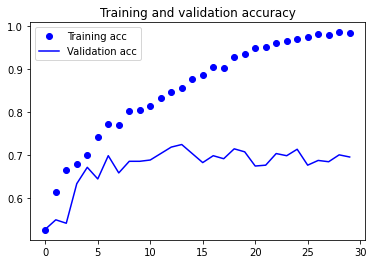

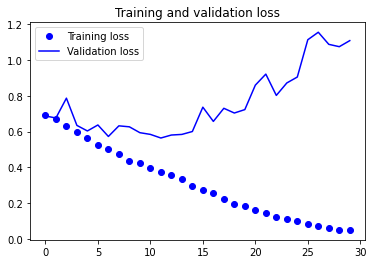

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Vemos *overfitting*

USANDO *DATA AUGMENTATION*

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

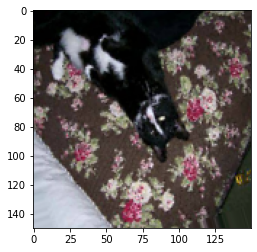

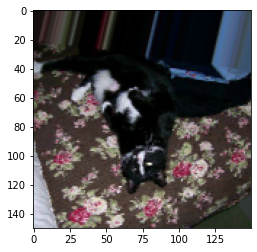

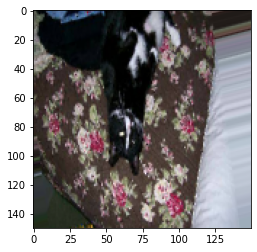

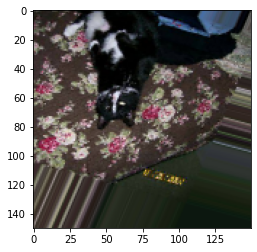

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[10] #no 3, 10

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20, #32
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 85s 851ms/step - loss: 0.5141 - acc: 0.7450
Epoch 2/100
100/100 [==============================] - 84s 839ms/step - loss: 0.5287 - acc: 0.7375
Epoch 3/100
100/100 [==============================] - 85s 854ms/step - loss: 0.5162 - acc: 0.7465
Epoch 4/100
100/100 [==============================] - 85s 851ms/step - loss: 0.5133 - acc: 0.7405
Epoch 5/100
100/100 [==============================] - 84s 841ms/step - loss: 0.5193 - acc: 0.7380
Epoch 6/100
100/100 [==============================] - 86s 859ms/step - loss: 0.4969 - acc: 0.7595
Epoch 7/100
100/100 [==============================] - 85s 849ms/step - loss: 0.5073 - acc: 0.7525
Epoch 8/100
100/100 [==============================] - 85s 845ms/step - loss: 0.4955 - acc: 0.7500
Epoch 9/100
100/100 [==============================] - 84s 839ms/step - loss: 0.5007 - acc: 0.7530
Epoch 10/100
100/100 [===

In [ ]:
ttrain_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 116s 1s/step - loss: 0.6282 - acc: 0.6415 - val_loss: 0.5910 - val_acc: 0.6730
Epoch 2/100
100/100 [==============================] - 114s 1s/step - loss: 0.6230 - acc: 0.6395 - val_loss: 0.6325 - val_acc: 0.6350
Epoch 3/100
100/100 [==============================] - 114s 1s/step - loss: 0.6016 - acc: 0.6795 - val_loss: 0.5765 - val_acc: 0.6910
Epoch 4/100
100/100 [==============================] - 114s 1s/step - loss: 0.5972 - acc: 0.6805 - val_loss: 0.5715 - val_acc: 0.6930
Epoch 5/100
100/100 [==============================] - 113s 1s/step - loss: 0.5932 - acc: 0.6760 - val_loss: 0.5707 - val_acc: 0.6760
Epoch 6/100
100/100 [==============================] - 113s 1s/step - loss: 0.5827 - acc: 0.6755 - val_loss: 0.5489 - val_acc: 0.7050
Epoch 7/100
100/100 [==============================] - 116s 1s/step - loss: 0.5769 - acc: 0.6985 - val_loss: 0.5

In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

KeyError: ignored

### Referencias
- https://colab.research.google.com/github/onietosi/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb#scrollTo=ZldKpnARGjjt 

- https://cs231n.github.io/convolutional-networks/ 

# 6 DL para texto y secuencias

## 6.1 Trabajar con texto (Básicos de NLP)

Mismo problema de siempre: no podemos trabajar con las palabras directamente. Debemos trabajar solo con entradas de tensores numericos. **vectorizar el texto** es el proceso de trnasformar texto en tensores numericos. esto se puede hacer:

- dividir el texto en palabras, y transformar cada palabra en un vector.

- dividir texto en carácteres, y transformar cada caracter en un vector.

- entraer n-grams de palabras o caracteres, y transformar cada n-gram en un vector.

DEF: N-gram es un grupo superpuesto de multiples palabras o caracteres consecutivos.

DEF: *tokens*: unidades en las que hemos separado las distintas palabras, caracteres o n-grams. (y tiene un verbo como acción de: *tokenization*). Imagen de texto a tokens a vectors:


Note, que existen muchas maneras de asociar un valor numerico en los vectores a los diferentes tokens.

**Para los N-grams y bag-of-words**

La siguiente linea: “The cat sat on the mat.”
Puede ser descompuesta de la siguiente manera:


> Set de 2-grams: 
{"The", "The cat", "cat", "cat sat", "sat",
"sat on", "on", "on the", "the", "the mat", "mat"}

> Set de 3-grams:
{"The", "The cat", "cat", "cat sat", "The cat sat",
"sat", "sat on", "on", "cat sat on", "on the", "the",
"sat on the", "the mat", "mat", "on the mat"}

![compartido](https://drive.google.com/uc?export=view&id=1dCB7wE0GUKDMDX9Zx4oAr95o6hg6BTHZ)

"Bolsa/Mochila (bag)" es un concepto que expresa perfectamente la carencia de orden dentro de el conjunto anterior (los *tokens* no tienen orden). No se usan mucho, DL puede extraer información de el orden que se pierde, funciona sin la necesidad de realizar estos subconjuntos.


### One-hot encoding de palabras y caracteres

Forma común y básica de transformar un token en un vector. Ya lo habiamos usado!: asociamos un indice entero único a cada palabra, para luego transformar estos índices en un vector binario de tamaño S, el tamañó del vocabulario del texto.

In [ ]:
# Codificación one-hot a nivel de palabras 

import numpy as np

# This is our initial data; one entry per "sample"
# (in this toy example, a "sample" is just a sentence, but
# it could be an entire document).
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# First, build an index of all tokens in the data.
token_index = {}
for sample in samples:
    # usamos el clasico split, un clasico resquicio de programación de primer 
    # deberiamos quitarle los puntos y otros caracteres raros en este paso 
    for word in sample.split():
        if word not in token_index:
            # Assign a unique index to each unique word
            token_index[word] = len(token_index) + 1
            # Note that we don't attribute index 0 to anything.

# VECTORIZACION
# We will only consider the first `max_length` words in each sample.
max_length = 10

#(1) vectorizacion de las muestras.Solo considerará las primeras palabras max_length en cada muestra.
results = np.zeros((len(samples), 
                    max_length,
                    max(token_index.values()) + 1)) #(1)
print(len(samples) , max_length , max(token_index.values()) + 1)  
print('Resultados antes:', results)                  

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.
print('Vectorizacion final', results)

2 10 11
Resultados antes: [[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
Vectorizacion final [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0

### One-hot encoding de caracteres

In [ ]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # All printable ASCII characters.
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.

Keras provee sus propias herramientas de tratado con tokens.

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take
# into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


### One-hot encoding con hashing trick a nivel de palabra

Por qué utilizarlo? Cuando la cantidad de tokens únicos en su vocabulario es demasiado grande para manejarla explícitamente.

**Perspectiva anterior:** Asignar explícitamente un índice a cada palabra y mantener una referencia de estas índices en un diccionario.

**Perspectiva nueva:**  dividir palabras en vectores de tamaño fijo, usando una función Hash. Así tenemos todas las ventajas y desventajas que tiene una tabla Hash (colisiones).

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Almacena las palabras como vectores de tamaño 1,000.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
#print('Results antes:\n', results)

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # Hash the word into a "random" integer index
        # that is between 0 and 1000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.
print('Results:', np.shape(results))
print('Results:\n', results)
print('\n')
print('Results:', np.shape(results[1,1]))
print('Results:\n', results[1,1])

# Note that if you have close to 1000 words (or more)
# you will start seeing many hash collisions, which
# will decrease the accuracy of this encoding method.

Results: (2, 10, 1000)
Results:
 [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Results: (1000,)
Results:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0

### Usando palabras embebidas (word embeddings)

Mediante codificación one-shot: binarios, en su mayoria hechos por 0s y de muy alta dimensión (n.dim: n. de palabras en el vocabulario). [sparse vectors]

A travéz de word embeddings: baja dimensionalidad, mucho mas 'densos' en el sentido de que llevan la misnma información pero mas comprimida. [dense vectors]

![compartido2](https://drive.google.com/uc?export=view&id=12LNMle-qBxjWb_xMQGEapMRWaDpeYn5i)


Dos formas de hacer esto:
- comienze con vectores de palabras aleatorios y luego aprende vectores de palabras de la misma manera que aprende los
pesos de una red neuronal.

-  Cargue en su modelo incrustaciones de palabras que se calcularon previamente mediante una tarea de aprendizaje automático diferente a la que está tratando de resolver

### Aprender word embeddings con la embedding layer

Las relaciones geométricas entre los vectores de palabras deberían reflejar las relaciones semánticas entre estas palabras. 
Esencialmente la idea es cuantificar con una distancia geometrica las relaciones entre las palabras.

> En la imagen siguiente, tenemos 4 palabras incrustadas en un plano 2D, codificando relaciones semánticas. Por ejemplo, el mismo vector nos permite pasar de gato a tigre y de perro a lobo: este vector podría interpretarse como el vector “de mascota a animal salvaje”. Por inspección también vemos la relación vector 'de canino a felino'.

![compartido2](https://drive.google.com/uc?export=view&id=1IlF8zL6nu15vvExKSUB47u1XofYYb1fJ)

> Tambien podria obtener vectores 'genero' o 'plural'. Por ejemplo, podemos añadir el vector 'femenino' a el vector 'rey' y obtener reina. Si agregamos el vector 'plural' obtendriamos 'reyes'.

Las relaciones semánticas varían de una tarea a otra: debemos aprender una nueva capa embedding para cada nueva tarea.

In [ ]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)



*Embedding Layer:* diccionario que mapea indices de numeros enteros (representando palabras especificas) a *dense vectors*.

> Word index ---> embedding layer ---> corresponding word vector

Ahora trabajaremos con IMDB, el clasico ejemplo.

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
#  Cortar textos después de este número de palabras
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Que espera la capa embedding layer:
Entrada: tensor 2D de enteros de tamaño *(samples, sequence_lenght)*, donde cada entrada es una secuencia de enteros. Todos las secuencias deben tener el mismo tamaño: seccuencias mas cortas se rellenan con 0s y secuencias mas largas se truncan.

Retorna: tensor 3D punto flotante que puede ser procesada por una capa RNN o una convolución de 1D. 

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6861 - acc: 0.5589 - val_loss: 0.6216 - val_acc: 0.6986
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5716 - acc: 0.7494 - val_loss: 0.5271 - val_acc: 0.7346
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4676 - acc: 0.7881 - val_loss: 0.5011 - va

## Usando redes pre-entrenadas



> Idea: cargar *embeddings vectors* de un precalculado *embedding space* que ya captura los aspectos genéricos de la estructura del lenguaje. esto soluciona el problema de no tener realmente demasiadas muestras (texto, palabras en NLP).

Algunas redes (capas) preentrenadas para keras (*Keras embedding layer*):
- Word2vec (Google-2013)

- GloVe [Global vectors for word representation] (standford 2014).

DESCARGAR LOS DATOS IMDB COMO TEXTO COMUN

In [ ]:
#!unzip path_to_file.zip -d path_to_directory
!unzip /content/drive/MyDrive/ColabNotebooks/Machine_Learning_IPD440_Codes_S2_2020_ItaloSalgado/aclImdb.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: __MACOSX/aclImdb/train/pos/._7754_9.txt  
  inflating: aclImdb/train/pos/7755_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: aclImdb/train/pos/7756_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: aclImdb/train/pos/7757_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: aclImdb/train/pos/7758_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: aclImdb/train/pos/7759_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: aclImdb/train/pos/775_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: aclImdb/train/pos/7760_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: aclImdb/train/pos/7761_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7761_10.txt  
  inflating: aclImdb/train/pos/7762_8.txt  
  inflating: __MACOSX/aclImdb/train/

Ahora, cada review individual para entrenar se guarda en una lista de strings: un string por review.

Las etiquetas para cada review (buena/mala) se guardaran en una lista de etiquetas.

PD: recuerde trabajar con los zips directamente de las consolas, las IDEs tienen muchos problemas para manejar muchos archivos!.

In [ ]:
import os

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

TOKENIZING DE LOS DATOS

- Aqui prepararemos el texto para crea un conjunto de validación y otro de entrenamiento. Las redes preentrenadas *embeddings* son particularmente útiles cuando tenemos un conjuto muy pequeño de datos de entrenamiento disponibles.

- Así, nos crearemos artificialmente un problema de falta de texto: reduciremos nuestras muestras a las primeras 200 muestras. Esperamos poder clasificar entonces solo con estas 200 muestras.

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # Cortamos las reviews a las 100 palabras.
training_samples = 200 # 200 muestras para entrenamiento
validation_samples = 10000  # validación sobre 10000 samples
max_words = 10000  #consideramos el top 10,000  de palabras en el dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# separamos los datos en training set y validation set
# antes, barajamos los datos, recuerde que los datos
# estaban ordenados en negativos-positivos.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


DESCARGAR GloVe

> Descripción: puede visitar https://nlp.stanford.edu/projects/glove/ para mayores detales.

Descargaremos el *embedding* precalculado. Contiene vectores incrustados (*embedding*) de dimensión 100 para 400000 palabras. Primero tenemos que descomprimir esto:

In [ ]:
!unzip /content/drive/MyDrive/ColabNotebooks/Machine_Learning_IPD440_Codes_S2_2020_ItaloSalgado/glove.6B.zip

Archive:  /content/drive/MyDrive/ColabNotebooks/Machine_Learning_IPD440_Codes_S2_2020_ItaloSalgado/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


PREPROCESAR LOS DATOS INCRUSTADOS (*EMBEDDINGS*)

Construimos un  arreglo (índice) que relacione las palabras (como cadenas) con su representación vectorial (como vectores numéricos).

In [ ]:
glove_dir = '/content/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split() #un clasico de split de primer año
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32') 
    embeddings_index[word] = coefs #arreglo de indices
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Ahora deberiamos construir una matriz *embedding* que podamos cargar en la *embedding layer*. Recuerde que la dimensión de algo así deberia ser:
 > (max_words, embedding_dim)

 donde cada entrada $i$ contiene el vector dimensional *embedding_dim* para la palabra de el index $i$ en referencia a el índice de la palabra (*index word*, el de la *tokenization*). 

In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

DEFINICION DEL MODELO

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


CARGAR EL GloVe Embedding EN EL MODELO

Congelamos la *embedding layer*. No queremos olvidar lo que esta red ya previamente sabía, solo debemos cambiar nuestro clasificador, para este caso.

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

ENTRENAR Y EVALUAR EL MODELO

Compilar y entrenar el modelo.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 159ms/step - loss: 1.5474 - acc: 0.4992 - val_loss: 0.7227 - val_acc: 0.5070
Epoch 2/10
7/7 [==============================] - 1s 88ms/step - loss: 0.6632 - acc: 0.5982 - val_loss: 0.7606 - val_acc: 0.5101
Epoch 3/10
7/7 [==============================] - 1s 89ms/step - loss: 0.5322 - acc: 0.6984 - val_loss: 0.6941 - val_acc: 0.5473
Epoch 4/10
7/7 [==============================] - 1s 88ms/step - loss: 0.3072 - acc: 0.9451 - val_loss: 0.7710 - val_acc: 0.5080
Epoch 5/10
7/7 [==============================] - 1s 87ms/step - loss: 0.2581 - acc: 0.9608 - val_loss: 0.6931 - val_acc: 0.5597
Epoch 6/10
7/7 [==============================] - 1s 88ms/step - loss: 0.1628 - acc: 0.9866 - val_loss: 0.6984 - val_acc: 0.5574
Epoch 7/10
7/7 [==============================] - 1s 89ms/step - loss: 0.1157 - acc: 1.0000 - val_loss: 0.7887 - val_acc: 0.5403
Epoch 8/10
7/7 [==============================] - 1s 88ms/step - loss: 0.1893 - acc: 0.9270 - va

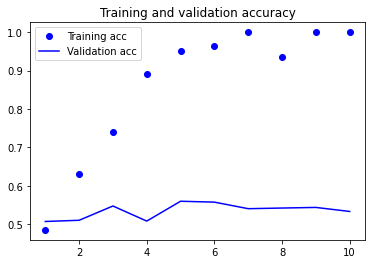

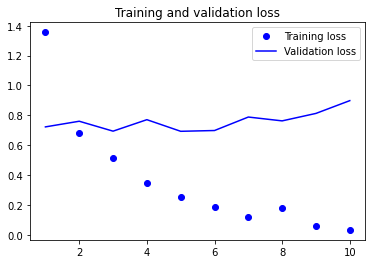

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Conclusiones:
- Rápido overfitting, en muy pocas epocas.
- 50% de presición (mucha varianza en la predicción)

> Jugueteo: También podemos entrenar el mismo modelo sin cargar las incrustaciones de palabras pre-entrenadas y sin congelar la capa de incrustación. 
Así, aprenderemos una tarea específica de incrustación de los tokens de entrada, que generalmente es más potente que las incrustaciones de palabras preentrenadas cuando hay muchos datos disponibles. Pero en este caso, tenemos
sólo 200 muestras de entrenamiento. 

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#model.layers[0].set_weights([embedding_matrix])
#model.layers[0].trainable = False

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 117ms/step - loss: 0.6936 - acc: 0.4919 - val_loss: 0.6928 - val_acc: 0.5098
Epoch 2/10
7/7 [==============================] - 1s 96ms/step - loss: 0.5336 - acc: 0.9963 - val_loss: 0.6970 -

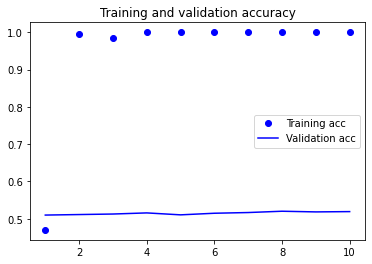

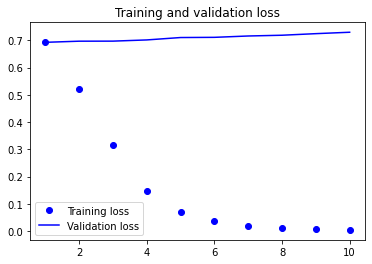

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Por último, evaluemos el modelo en los datos de la prueba. Primero, necesitaremos comprobar los datos de la prueba:

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.9048 - acc: 0.5376


[0.9047612547874451, 0.5375999808311462]

Muy mala precisión: 54%. Pocos datos lo complica todo.

## 6.2 Entendiendo RNN

Otras redes que ya vimos:
- Fully connected networks

- Convolutional networks

en estas. cada entrada que se ingresa es procesada independientemente, sin mantener estados entre las entradas (no tienen memoria). Con tales redes, para procesar una secuencia o una serie temporal de puntos de datos, hay que mostrar toda la secuencia a la red de una sola vez: convertirla en un único punto de datos.

Por ejemplo, esto es lo que se hizo en el ejemplo del IMDB: una reseña de película entera se transformó en un solo gran vector y se procesó de una sola vez. Estas redes se llaman *feedforward networks*

*Una nueva idea:* Leer la frase, y procesarla palabra por palabra recordando  lo que paso anteriormente. 

> Nota: Inteligencia biologica procesa la información de manera incremental manteniendo un modelo interno de que se esta procesando, construido con la información del pasado y constantemente actualixzado con nueva información que le llega a la neurona.

Esta idea anterior es la que atrapa a las RNN muy simplificada: procesar secuencias iterando sobre los elementos de la secuencia y manteniendo un estado que contiene la información relativa a lo que ya paso (con un *loop* interno).

El estado de estas se reinicia cuando procesan dos secuencias distintas e independientes, asi que podemos considerar **una secuencia como un solo dato, un solo input a la neurona**.

![compartido2](https://drive.google.com/uc?export=view&id=1we_ni6q3pWoBgrI06Yld87Cneg65DP_A)

Ejemplo de implementación de una neurona recurrente muy simple:


In [ ]:
import numpy as np

timesteps = 100 #numero de interaciones en la serie tiempo de la secuencia de entrada
input_features = 32 #dimension de la entrada
output_features = 64 #dimension del la salida
inputs = np.random.random((timesteps, input_features)) #solo por el ejemplo
print('Size of inputs:', inputs.shape)

state_t = np.zeros((output_features,)) #estado inicial 0

#matrices inicializadas en valores aletarios
W = np.random.random((output_features, input_features))
print('Size of W:', W.shape)

U = np.random.random((output_features, output_features))
print('Size of U:', U.shape)

b = np.random.random((output_features,))
print('Size of b:', b.shape)

successive_outputs = []
for input_t in inputs: #Size of input_t: (32,)

  #aqui esta la clave: combinamos la entrada con el estado actual que es la
  #salida anterior y obtenemios la nueva salida
  #Size of output_t: (64,)
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t #actualizamos el estado de la red

final_output_sequence = np.concatenate(successive_outputs, axis=0)
print('Size of final_output_sequence:', final_output_sequence.shape)

print('Size of successive_outputs:', len(successive_outputs))

Size of inputs: (100, 32)
Size of W: (64, 32)
Size of U: (64, 64)
Size of b: (64,)
Size of final_output_sequence: (6400,)
Size of successive_outputs: 100


In [ ]:
#entrada esperada: secuencia de vectores, o sea un tensor 2D.
#(timesteps, input_features)

#aqui procesamos *batches* de secuencias, en lugar de solo una secuencia
#se esperaria en ese caso entonces: (batch_size, timesteps, input_features)
#esto se puede controlar facilmente con return_sequences

from keras.layers import SimpleRNN

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()

#retorna tensor 2D de tamano (batch_size, output_features)
model.add(Embedding(10000, 32)) 
model.add(SimpleRNN(32))
model.summary()

model = Sequential()
model.add(Embedding(10000, 32))

#retorna tensor 3D de tamano (batch_size, timesteps, output_features)
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


A veces es comun apilar capas recursivas así:

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # esta capa retorna solo las últimas salidas
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


EJEMPLO CON IMDB, EL CLÁSICO

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  #numero de palabras a considerar en las caracteristicas
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print(input_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
print(input_train[555])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

NameError: ignored

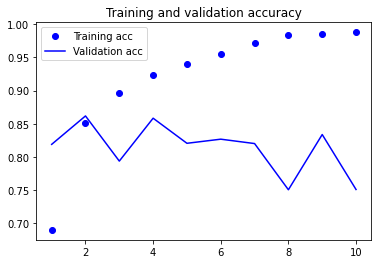

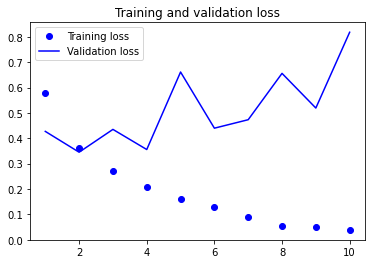

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- Presicion del algoritmo en 3.Iniciando con redes neuronales: 88%
- Presicion de este: 85%

falta complejidad en la modelación. Consideramos solo las primeras 500 palabras, mientras en el ejemplo 3. consideramos la secuencia completa. Falta mayor recurrencia dado el largo del texto que estamos procesando. En general simpleRNN no se usa. 

LSTM(Long short-term memory) Y GRU

Necesitamos retener durante mas iteraciones la información para obtener caracteristicas en textos largos (*vanishing gradient problem*).

- LSTM: variante de simpleRNN que acarrea información a travéz de muchos *timesteps*

![compartido2](https://drive.google.com/uc?export=view&id=1YfUWizUlpvM6S7i6g70otgFMxBStfGpx)


In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32)) 

model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 49s 303ms/step - loss: 0.6120 - acc: 0.6675 - val_loss: 0.4776 - val_acc: 0.7744
Epoch 2/10
157/157 [==============================] - 50s 320ms/step - loss: 0.3341 - acc: 0.8716 - val_loss: 0.2871 - val_acc: 0.8866
Epoch 3/10
157/157 [==============================] - 50s 321ms/step - loss: 0.2385 - acc: 0.9078 - val_loss

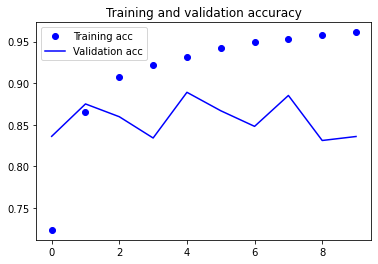

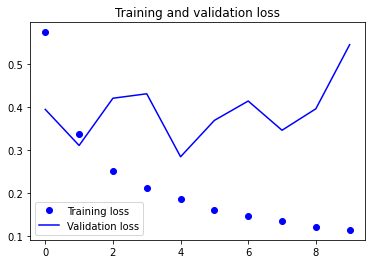

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 8

## 8.4 Autoencoders

DEFINICIONES PREVIAS

*Latent space*: una representación de un espacio, comprimido (latente viene de 'oculto').

Varias ideas:
- aprender las características de los datos y simplificar las representaciones de datos con el fin de encontrar patrones.

- Este "estado comprimido" es la representación del espacio latente (*latent space*) de nuestros datos.

CONTEXTO DE LA SECCION

La generación de imágenes con aprendizaje profundo se realiza mediante el aprendizaje de *latent spaces* que capturan información estadística sobre un conjunto de datos de imágenes. Al muestrear y decodificar puntos del *latent spaces*, puede generar imágenes nunca antes vistas.

Hay dos herramientas principales para hacer esto:
 - VAE  : dan como resultado representaciones *latent*  continuas y altamente estructuradas. Por esta razón, funcionan bien para realizar todo tipo de edición de imágenes en el *latent spaces*: intercambio de caras, convertir una cara con el ceño fruncido en una cara sonriente, etc. También funcionan muy bien para hacer animaciones basadas en el *latent spaces*, como animar un paseo a lo largo de una sección transversal del *latent spaces*, mostrando una imagen inicial que se transforma lentamente en diferentes imágenes de forma continua.

 - GAN:
permiten la generación de imágenes realistas de un solo cuadro, pero es posible que no induzcan *latent spaces* con una estructura sólida y una gran continuidad.
Las aplicaciones prácticas más exitosas que se han visto con imágenes se basan en VAE, pero las GAN son extremadamente populares en el mundo de la investigación académica, al menos, alrededor de 2016-2017.



AUTOENCODERS

Idea: dado un *latent space* de representaciones, o un espacio de incrustación (*embedding space*), ciertas direcciones en el espacio pueden codificar interesantes variaciones en los datos originales. En un *latent space*  de imágenes de rostros, por ejemplo, puede haber un vector de sonrisa s, tal que si el punto latente z es la representación *embedded* de una determinada cara, entonces el punto latente z + s es la *embedded representation * de la misma cara, sonriente.

Una vez que haya identificado dicho vector, será posible editar imágenes proyectándolas en el *latent space* , moviendo su representación de manera significativa y luego decodificándolas de nuevo en el espacio de la imagen. Hay vectores de conceptos para prácticamente cualquier dimensión, independiente de variación en el espacio de la imagen, en el caso de
caras, puede descubrir vectores para añadir gafas de sol a una cara, quitarse las gafas, convertir una cara masculina en una cara femenina, etc.

Con mas detalle:
> Definición: Toma una imagen y la mapea a un latent vector space via un encoder module, y lo decodifica de vuelta en una salida que tiene las mismas dimensiones de la imagen de salida, a través del decoder module.

> Luego se entrena utilizando como datos de destino las mismas imágenes que las imágenes de entrada, lo que significa que el autocodificador aprende a reconstruir las entradas originales. Al imponer varias restricciones al código (la salida del codificador), se puede conseguir que el autocodificador aprenda más o menos interesantes representaciones latentes de los datos. Lo más común es restringir el código para que sea de baja dimensión y disperso (mayormente ceros), en cuyo caso el codificador actúa como una forma de comprimir los datos de entrada en menos bits de información.

> En la práctica, tales autocodificadores clásicos no conducen a espacios latentes particularmente útiles o bien estructurados. Tampoco son muy buenos para la compresión. Por estas razones, en gran medida han pasado de moda. Sin embargo, los VAE aumentan los autocodificadores con un poco de magia estadística que los obliga a aprender espacios latentes continuos y altamente estructurados. Se han convertido en una poderosa herramienta para la generación de imágenes.

> Una VAE , en lugar de comprimir su imagen de entrada en un código fijo en el espacio latente, convierte la imagen en los parámetros de una distribución estadística: **una media y una varianza**. Esencialmente, esto significa que asumes que la imagen de entrada ha sido generada por un
proceso estadístico, y que el carácter aleatorio de este proceso debe tenerse en cuenta durante la codificación y la descodificación. 

> La VAE utiliza entonces los parámetros de media y varianza para muestrear aleatoriamente un elemento de la distribución, y decodifica ese elemento de vuelta a la entrada original. La estocasticidad de este proceso
mejora la robustez y obliga al espacio latente a codificar representaciones significativas en todas partes: cada punto muestreado en el espacio latente es decodificado a una salida válida.



La implementación de aquí en adelante sigue la siguiente lógica:



- Un módulo de codificación *Encoder* que convierte las muestras de entrada input_img en dos parametros en una representación  latent space: *z_mean* y *z_log_variance*.

- De manera aleatoria muestreamos un punto *z* de el latent normal distribution que se supone que genera la imagen de entrada, a través de: $z = \mu_z + \exp(log(\sigma_z)) \cdot \epsilon$, donde $\epsilon$ es un tensor aleatorio de pequeños valores.


  ![compartido01](https://drive.google.com/uc?export=view&id=183Wh1JPD-0hNz-nocU-YUs87S7xCm-kS)


- Los parámetros de un VAE son entrenados a travéz de dos funciones de perdida: una *reconstruction loss* que fuerza a las muestras codificadas a coincidir con las entradas inciales, y una *regularization loss* que ayuda a que el *latent space* este bien formado y reduce el *overfitting* de los datos de entrenamiento.

- Un módulo decoder que mapea este punto de el latent space de vuelta a el espacio originial de la imagen de entrada.


- Debido a que la epsilon es aleatoria, el proceso asegura que cada punto que está cerca de la ubicación latente donde codificamos *input_img* ( z-mean ) puede ser decodificado a algo similar a *input_img* , obligando así a que el espacio latente sea continuamente significativo. Cualquier dos puntos cercanos en el espacio latente se decodificará a imágenes muy similares. La continuidad, combinada con la baja dimensionalidad del espacio latente, obliga a cada dirección del espacio latente a codificar un eje de variación significativo de los datos, lo que hace que el espacio latente esté muy estructurado y, por tanto, sea muy adecuado para su manipulación mediante vectores de concepto.
Los parámetros de una VAE se entrenan a través de dos funciones de pérdida: una pérdida de reconstrucción que obliga a las muestras decodificadas a coincidir con las entradas iniciales, y una pérdida de regularización que ayuda a aprender los espacios latentes bien formados y a reducir la sobrecarga de los datos de entrenamiento. 



Pseudocódigo de esto:

In [ ]:
from keras import backend as K
K.clear_session() #limpiar, mas memoria

#codificamos la entrada en un parametro de media y varianza
z_mean, z_log_variance = encoder(input_img)

# dibujamos un latent point usando un pequeñito epsilon al azar
z = z_mean + exp(z_log_variance) * epsilon

# y luego decodificamos z vuelta a la dimensión de la imagen
reconstructed_img = decoder(z)

# Instanciamos el modelo
model = Model(input_img, reconstructed_img)

# Luego entrenamos el modelo usando dos pérdidas:
# una reconstruction loss y una regularization loss

Aquí mostramos la red encoder que usaremos, mapeamos imágenes a al espacio parametrizado  a través de una distribución del latent space.

el código que sigue muestra una simple ConvNet que mapea la imagen de entrada *x* a dos vectores *z_mean* y *z_log_var*.

Errata: aqui hay un tremendo problema con las librerias y las versiones de keras y tf. Al parecer el manejo de objetos *model* tiene un desfase en las implemenaciones de keras con tf. Esto se soluciona desactivando versiones incompatibles cruzadas:

- https://stackoverflow.com/questions/61056781/typeerror-tensor-is-unhashable-instead-use-tensor-ref-as-the-key-in-keras

In [ ]:
import keras
from keras import layers
#from keras import backend as K
#from keras.models import Model
import numpy as np

from tensorflow.keras.models import Model 
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2  # dimensionalidad del latent space: un plano

#recordatorio:
#Input () se usa para instanciar un tensor de Keras.
#Un tensor de Keras es un objeto tensor simbólico de TensorFlow, que aumentamos 
#con ciertos atributos que nos permiten construir un modelo de Keras con solo 
#conocer las entradas y salidas del modelo.
#Por ejemplo, si a, b y c son tensores de Keras, es posible hacer: 
#modelo = Modelo (entrada = [a, b], salida = c)
input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3,
                  padding='same', activation='relu')(input_img)  #same no le quita dim
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu',
                  strides=(2, 2))(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3,
                  padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

#la imagen de entrada termina codificada en estos dos parametros
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

Ahora sigue un código para usar $\mu_z$ y $\log(\sigma_z)$, los parámetros de la distribución estadísitica asumida que produce *input_img*, para generar el *latent space* z, un punto.

En keras todo debe ser una capa, por lo que el código que no forma parte de una capa debe estar contenido en una capa personalizada *lambda*.

In [ ]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])



Implementación del decoder.

In [ ]:
# un reshape del vector z a la dimensión de una imagen
# This is the input where we will feed `z`, que literal es decirle los dos 
#parametros que buscamos llenar
decoder_input = layers.Input(K.int_shape(z)[1:])
print(decoder_input.shape, decoder_input)
print(K.int_shape(z)[1:])

# Upsample to the correct number of units, forma antes de aplanar
x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

# Reshape into an image of the same shape as before our last `Flatten` layer
# un reshape de z en un feature map con el mismo tamaño del feature map
# justo antes de la ultima capa Flatten en el encoder model
x = layers.Reshape(shape_before_flattening[1:])(x)

# algunas capas ConvNet para obtener una imagen final de salida
#de las mismas dimensiones de la imagen original
# We then apply then reverse operation to the initial
# stack of convolution layers: a `Conv2DTranspose` layers
# with corresponding parameters.
x = layers.Conv2DTranspose(32, 3,
                           padding='same', activation='relu',
                           strides=(2, 2))(x)
x = layers.Conv2D(1, 3,
                  padding='same', activation='sigmoid')(x)
# We end up with a feature map of the same size as the original input.

# instanciamos un decoder model, que convertira una *decoder_input* en la
#imagen decodificada 
decoder = Model(decoder_input, x)

# We then apply it to `z` to recover the decoded `z`.
z_decoded = decoder(z)

(None, 2) Tensor("input_2:0", shape=(None, 2), dtype=float32)
(2,)


No especificamos una función de perdida porque queremos utilizar lo que hablamos mas arriba. con ello implementamos:

In [ ]:
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(
            1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        # We don't use this output, pero la capa debe devolver algo
        return x

# We call our custom layer on the input and the decoded output,
# to obtain the final model output.
y = CustomVariationalLayer()([input_img, z_decoded])

Usaremos MNIST, numeros 0 al 9 para generarles.

Estamos listos para crear instancias y entrenar el modelo. Note que la perdida está implementada en la capa personalizada de mas arriba. entonces, no tenemos que especificar una pérdida en el modelo vae a entrenar.

Con ello, no pasaremos target data durante el entrenamiento, solo pasamos los x_train para entrenar

In [ ]:
from keras.datasets import mnist

vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

# Train the VAE on MNIST digits
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

vae.fit(x=x_train, y=None,
        shuffle=True,
        epochs=10,
        batch_size=batch_size,
        validation_data=(x_test, None))

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 14, 14, 64)   18496       conv2d_19[0][0]                  
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 14, 14, 64)   36928       conv2d_20[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 347s 6ms/sample - loss: 0.2122 - val_loss: 0.1962
Epoch 2/10
60000/60000 [==============================] - 346s 6ms/sample - loss: 0.1911 - val_loss: 0.1892
Epoch 3/10
60000/60000 [==============================] - 347s 6ms/sample - loss: 0.1865 - val_loss: 0.1842
Epoch 4/10
60000/60000 [==============================] - 349s 6ms/sample - loss: 0.1842 - val_loss: 0.1831
Epoch 5/10
60000/60000 [==============================] - 350s 6ms/sample - loss: 0.1826 - val_loss: 0.1834
Epoch 6/10
60000/60000 [==============================] - 348s 6ms/sample - loss: 0.1814 - val_loss: 0.1810
Epoch 7/10
60000/60000 [==============================] - 349s 6ms/sample - loss: 0.1805 - val_loss: 0.1842
Epoch 8/10
60000/60000 [==============================] - 351s 6ms/sample - loss: 0.1797 - val_loss: 0.1802
Epoch 9/10
60000/60000 [==============================] - 352s 6ms/sample - loss: 0.1792 - val_loss: 0.1795
Epoch 10/10
60000/60000 [==============

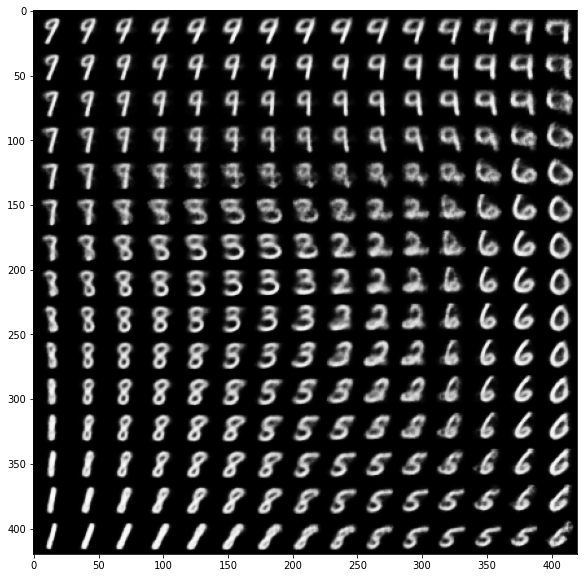

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# Linearly spaced coordinates on the unit square were transformed
# through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z,
# since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

Un twitter de F. Chollet nos dice que esta forma ya esta anticuada (2 años, y ya esta anticuada -_- ). Al parecer, ahora es mejor utilizar autoencoders con una perspectiva probabilistica en tensorflow, o las implementaciones directas de keras que el mismo creo. Esto está en:

- https://keras.io/examples/generative/vae/

### Otra perspectiva mas actual: Advanced Deep Learning with Tensorflow 2 and Keras: Chapter 3.

Recuerde: 
 - Encoder: input $x$ a un *low dimensional latent vector:* $z=f(x)$

 -Decoder: intenta recuperar la entrada de un *latent vector*, $g(z) = x^{'}$

 Diagrama seria algo así:

 x (un 7, por ejemplo)--> Encoder $f(x)$ --> 16-dim $z$ --> decoder $g(z)$ --> $x^{'}$ (un 7 parecido a x, pero no igual)

 Diagramas del siguiente código:

Encoder:
 ![compartido2](https://drive.google.com/uc?export=view&id=11z0lDatjA3Lhuqd7x_8XL6nNTYwXC6vN)


Decoder:
 ![compartido3](https://drive.google.com/uc?export=view&id=1OsrW1KdBlTR2_1amCw_vGKa61fi8OyzW)

Diagrama general:
  ![compartido4](https://drive.google.com/uc?export=view&id=1CnNMcreyDXn2L61sSvG67yCAyUov-mEa)






Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                50192     
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Sh

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 101s 2ms/sample - loss: 0.0214 - val_loss: 0.0103


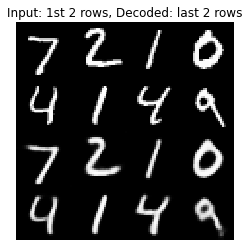

In [ ]:
'''Example of autoencoder model on MNIST dataset
This autoencoder has modular design. The encoder, decoder and autoencoder
are 3 models that share weights. For example, after training the
autoencoder, the encoder can be used to  generate latent vectors
of input data for low-dim visualization like PCA or TSNE.
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

# load MNIST dataset
#en este ejemplo tendremos entonces una salida
# de m = width*height*channels = 28*28*1=784
(x_train, _), (x_test, _) = mnist.load_data()

# reshape to (28, 28, 1) and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
latent_dim = 16
# encoder/decoder number of CNN (red convolucional) layers and filters per layer
layer_filters = [32, 64]

# build the autoencoder model
# first build the encoder model, que son 2 capas Covnets
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
# stack of Conv2D(32)-Conv2D(64)
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)

#guardamos info del shape para el decodificador
# shape info needed to build decoder model
# so we don't do hand computation
# the input to the decoder's first
# Conv2DTranspose will have this shape
# shape is (7, 7, 64) which is processed by
# the decoder back to (28, 28, 1)
shape = K.int_shape(x)

# generate latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# instantiate encoder model
encoder = Model(inputs,
                latent,
                name='encoder')
encoder.summary()
plot_model(encoder,
           to_file='encoder.png',
           show_shapes=True)

# build the decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
# use the shape (7, 7, 64) that was earlier saved, este dense es el latent vector
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
# from vector to suitable shape for transposed conv
x = Reshape((shape[1], shape[2], shape[3]))(x)

# stack of Conv2DTranspose(64)-Conv2DTranspose(32), llamado deconvolution
# producimos una imagen dado un feature map
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)

# reconstruct the input
outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='decoder.png', show_shapes=True)

# autoencoder = encoder + decoder
# instantiate autoencoder model
autoencoder = Model(inputs,
                    decoder(encoder(inputs)),
                    name='autoencoder')
autoencoder.summary()
plot_model(autoencoder,
           to_file='autoencoder.png',
           show_shapes=True)

# Mean Square Error (MSE) loss function, Adam optimizer
autoencoder.compile(loss='mse', optimizer='adam')

# train the autoencoder
autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=1,
                batch_size=batch_size)

# predict the autoencoder output from test data
x_decoded = autoencoder.predict(x_test)

# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('input_and_decoded.png')
plt.show()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 2)                 6274      
Total params: 25,090
Trainable params: 25,090
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Sh

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0545 - val_loss: 0.0478
Epoch 2/20
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.0465 - val_loss: 0.0454
Epoch 3/20
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.0446 - val_loss: 0.0442
Epoch 4/20
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.0436 - val_loss: 0.0435
Epoch 5/20
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0430 - val_loss: 0.0433
Epoch 6/20
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.0426 - val_loss: 0.0427
Epoch 7/20
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0423 - val_loss: 0.0425
Epoch 8/20
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0420 - val_loss: 0.0422
Epoch 9/20
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.0417 - val_loss: 0.0420
Epoch 10/20
60000/60000 [=======================

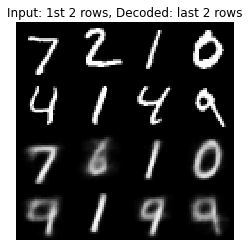

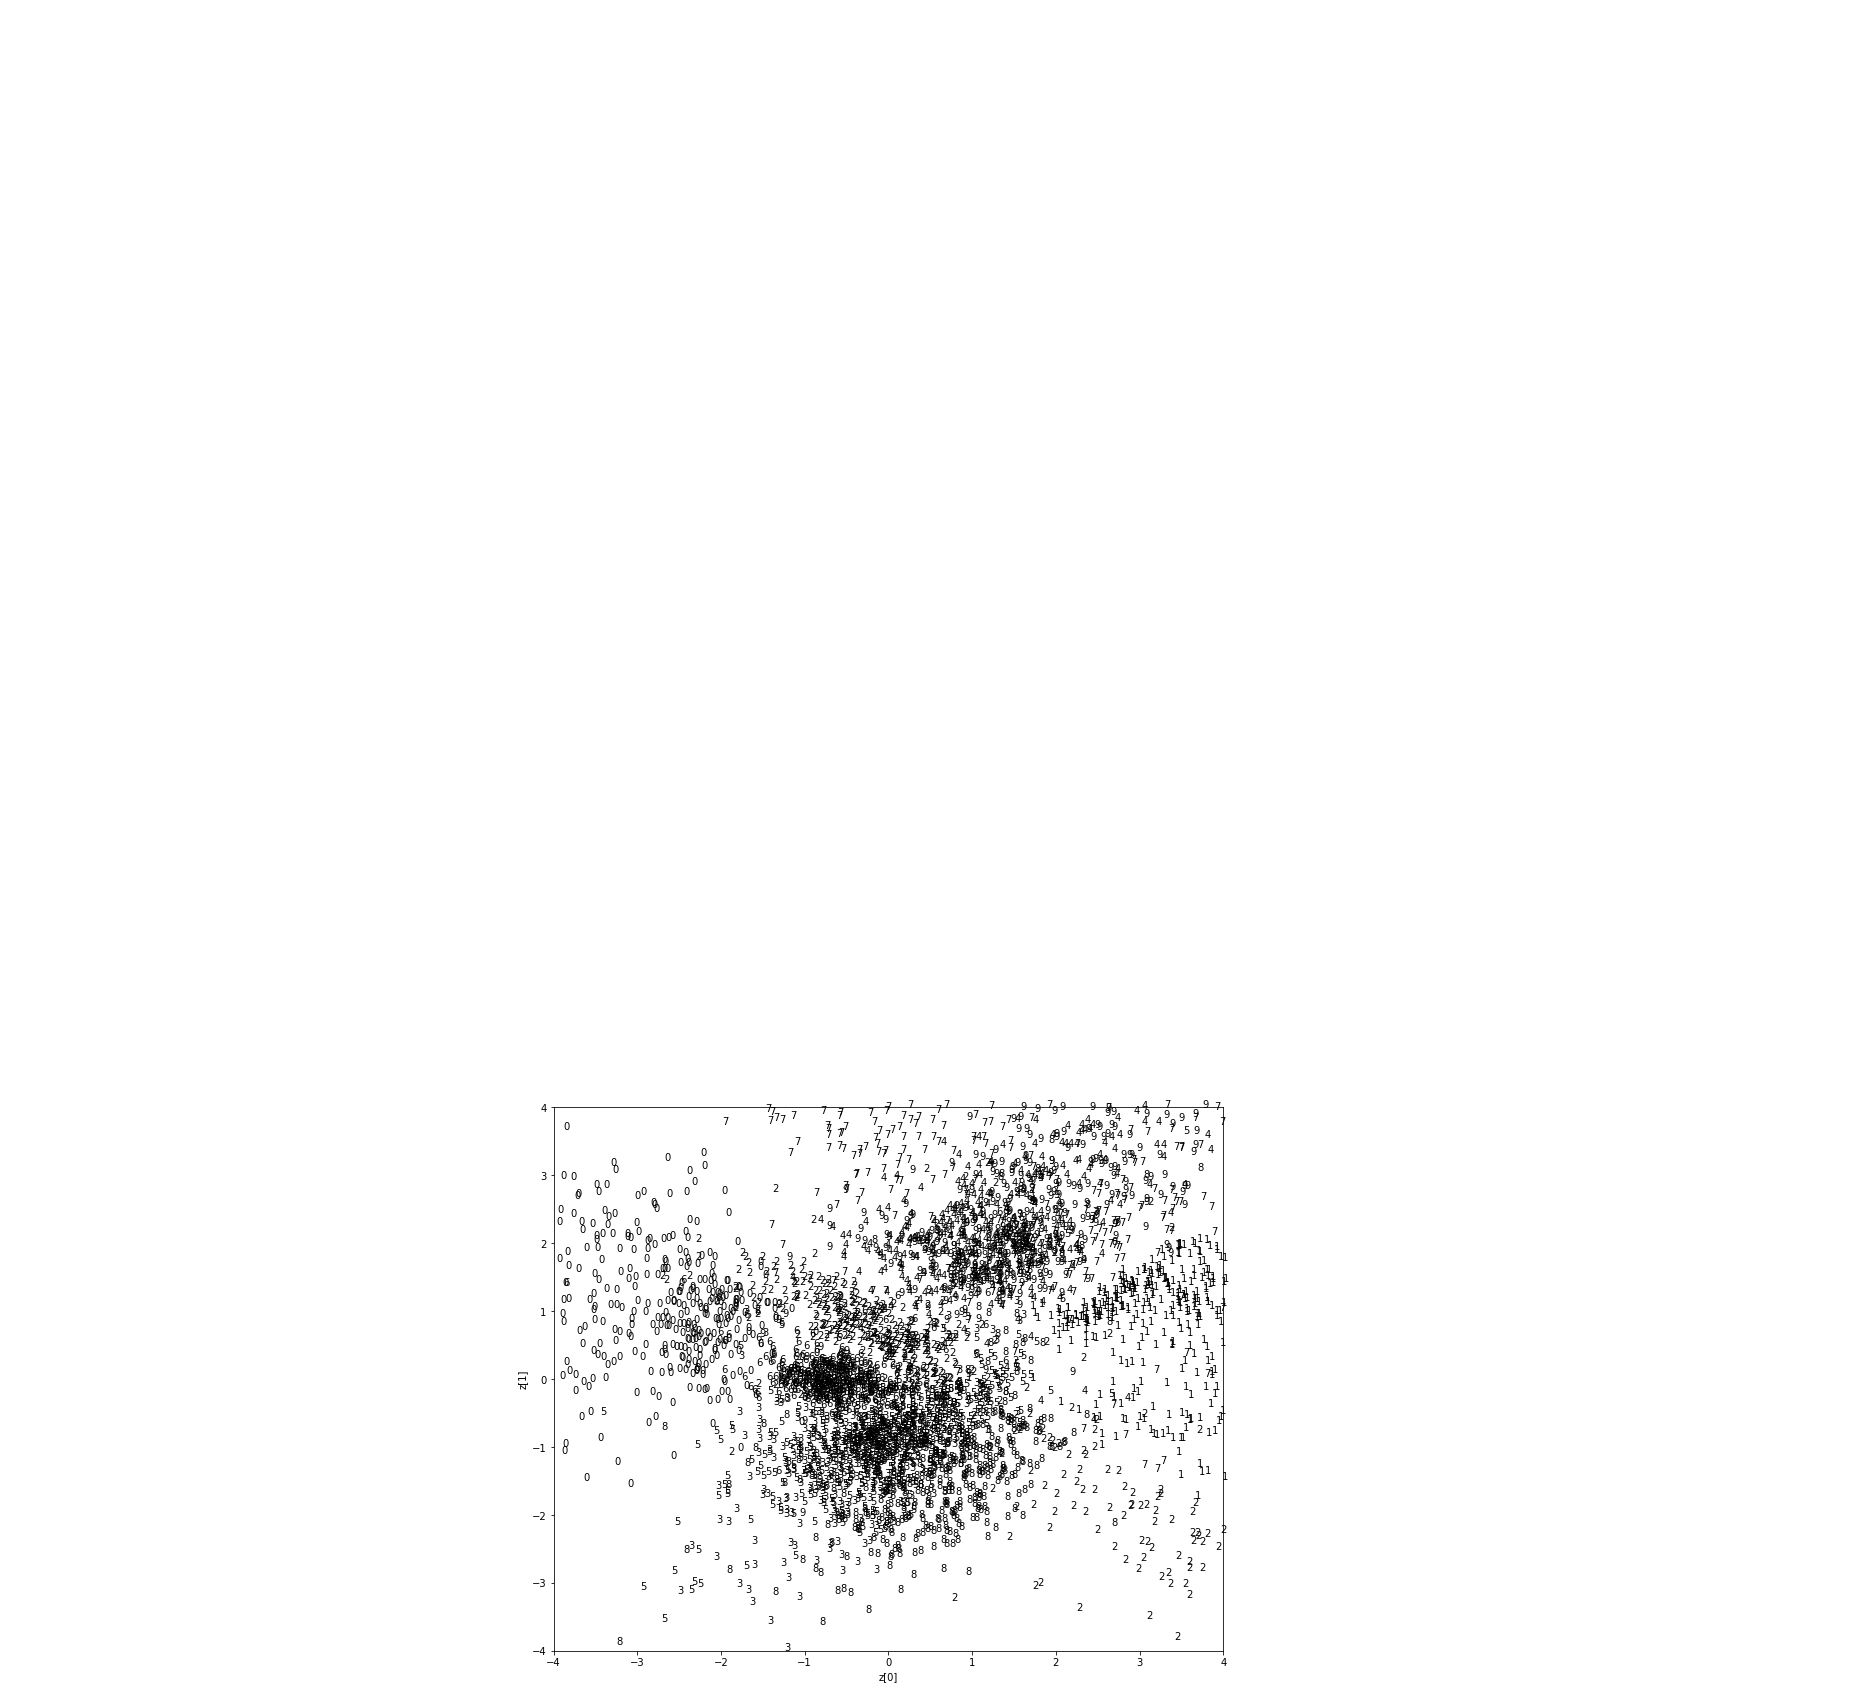

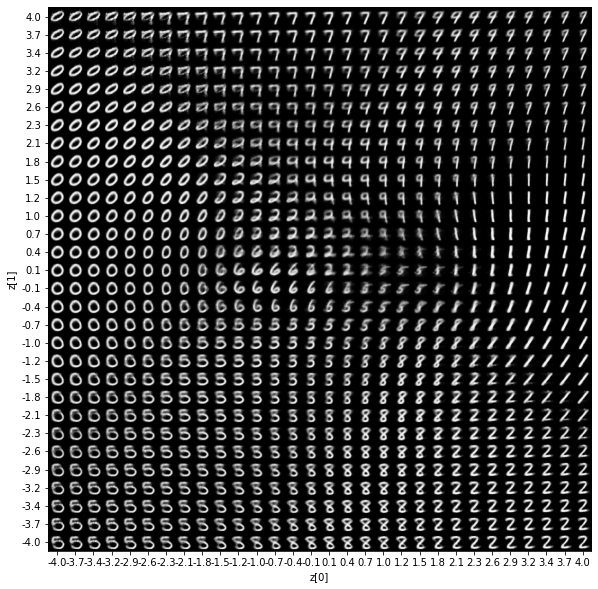

In [ ]:
'''Example of autoencoder model on MNIST dataset using 2dim latent
The autoencoder forces the encoder to discover 2-dim latent vector
that the decoder can recover the original input. The 2-dim latent
vector is projected on 2D space to analyze the distribution of code
in the latent space. The latent space can be navigated by varying the
values of latent vector to produce new MNIST digits.
This autoencoder has modular design. The encoder, decoder and autoencoder
are 3 models that share weights. For example, after training the
autoencoder, the encoder can be used to  generate latent vectors
of input data for low-dim visualization like PCA or TSNE.
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import os


def plot_results(models,
                 data,
                 batch_size=32,
                 model_name="autoencoder_2dim"):
    """Plots 2-dim latent values as scatter plot of digits
        then, plot MNIST digits as function of 2-dim latent vector
    Arguments:
        models (list): encoder and decoder models
        data (list): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    xmin = ymin = -4
    xmax = ymax = +4
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "latent_2dim.png")
    # display a 2D plot of the digit classes in the latent space
    z = encoder.predict(x_test,
                        batch_size=batch_size)
    plt.figure(figsize=(12, 10))

    # axes x and y ranges
    axes = plt.gca()
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([ymin,ymax])

    # subsample to reduce density of points on the plot
    z = z[0::2]
    y_test = y_test[0::2]
    plt.scatter(z[:, 0], z[:, 1], marker="")
    for i, digit in enumerate(y_test):
        axes.annotate(digit, (z[i, 0], z[i, 1]))
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of the digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(xmin, xmax, n)
    grid_y = np.linspace(ymin, ymax, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z = np.array([[xi, yi]])
            x_decoded = decoder.predict(z)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()


# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape to (28, 28, 1) and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
latent_dim = 2
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [32, 64]

# build the autoencoder model
# first build the encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
# stack of Conv2D(32)-Conv2D(64)
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)

# shape info needed to build decoder model so we don't do hand computation
# the input to the decoder's first Conv2DTranspose will have this shape
# shape is (7, 7, 64) which is processed by the decoder back to (28, 28, 1)
shape = K.int_shape(x)

# generate latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# instantiate encoder model
encoder = Model(inputs, latent, name='encoder')
encoder.summary()
plot_model(encoder, to_file='encoder.png', show_shapes=True)

# build the decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
# use the shape (7, 7, 64) that was earlier saved
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
# from vector to suitable shape for transposed conv
x = Reshape((shape[1], shape[2], shape[3]))(x)

# stack of Conv2DTranspose(64)-Conv2DTranspose(32)
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)

# reconstruct the input
outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='decoder.png', show_shapes=True)

# autoencoder = encoder + decoder
# instantiate autoencoder model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)

# Mean Square Error (MSE) loss function, Adam optimizer
autoencoder.compile(loss='mse', optimizer='adam')

# train the autoencoder
autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=20,
                batch_size=batch_size)

# predict the autoencoder output from test data
x_decoded = autoencoder.predict(x_test)

# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('input_and_decoded.png')
plt.show()

# project the 2-dim latent on 2D space
models = (encoder, decoder)
data = (x_test, y_test)
plot_results(models, data,
             batch_size=batch_size,
             model_name="autoencoder-2dim")

 ![compartido2](https://drive.google.com/uc?export=view&id=1ybiOQ8kxHcchKNx0HtMNZ-_KP0ChENmV)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
activation (Activation)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0   

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 217s 4ms/sample - loss: 0.2467 - classifier_loss: 0.2138 - decoder_loss: 0.0328 - classifier_accuracy: 0.9289 - classifier_mse: 0.0098 - decoder_accuracy: 0.8033 - decoder_mse: 0.0328 - val_loss: 0.0816 - val_classifier_loss: 0.0566 - val_decoder_loss: 0.0245 - val_classifier_accuracy: 0.9808 - val_classifier_mse: 0.0028 - val_decoder_accuracy: 0.8039 - val_decoder_mse: 0.0245
Epoch 2/2
60000/60000 [==============================] - 215s 4ms/sample - loss: 0.0900 - classifier_loss: 0.0678 - decoder_loss: 0.0221 - classifier_accuracy: 0.9794 - classifier_mse: 0.0032 - decoder_accuracy: 0.8082 - decoder_mse: 0.0221 - val_loss: 0.0641 - val_classifier_loss: 0.0438 - val_decoder_loss: 0.0225 - val_classifier_accuracy: 0.9876 - val_classifier_mse: 0.0020 - val_decoder_accuracy: 0.8034 - val_decoder_mse: 0.0225
[7 2 1 0 4 1 4 9]


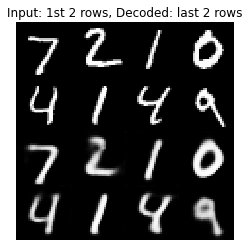

In [ ]:
''' Autoencoder with Classifier
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import keras
from keras.layers import Activation, Dense, Dropout, Input, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Reshape, Conv2DTranspose, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.callbacks import TensorBoard
from keras import backend as K

import math
import matplotlib.pyplot as plt

# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_labels = np.amax(y_train) + 1
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Network parameters
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
dropout = 0.4
filters = 16
latent_dim = 16

# Build the autoencoder model
# First build the encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
# Stack of BN-ReLU-Conv2D-MaxPooling blocks
for i in range(2):
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    filters = filters * 2
    x = Conv2D(filters=filters, kernel_size=kernel_size,
               padding='same')(x)
    x = MaxPooling2D()(x)

# Shape info needed to build decoder model
shape = x.shape.as_list()

# Generate a 16-dim latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# Instantiate encoder model
encoder = Model(inputs, latent, name='encoder')
encoder.summary()
plot_model(encoder, to_file='classifier-encoder.png', show_shapes=True)

# Build the Decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1]*shape[2]*shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

# Stack of BN-ReLU-Transposed Conv2D-UpSampling blocks
for i in range(2):
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(filters=filters, kernel_size=kernel_size,
                        padding='same')(x)
    x = UpSampling2D()(x)
    filters = int(filters / 2)

x = Conv2DTranspose(filters=1, kernel_size=kernel_size,
                    padding='same')(x)

outputs = Activation('sigmoid', name='decoder_output')(x)

# Instantiate Decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='classifier-decoder.png', show_shapes=True)

# Classifier Model
latent_inputs = Input(shape=(latent_dim,), name='classifier_input')
x = Dense(512)(latent_inputs)
x = Activation('relu')(x)
x = Dropout(0.4)(x)
x = Dense(256)(x)
x = Activation('relu')(x)
x = Dropout(0.4)(x)
x = Dense(num_labels)(x)
classifier_outputs = Activation('softmax', name='classifier_output')(x)
classifier = Model(latent_inputs, classifier_outputs, name='classifier')
classifier.summary()
plot_model(classifier, to_file='classifier.png', show_shapes=True)

# Autoencoder = Encoder + Classifier/Decoder
# Instantiate autoencoder model
autoencoder = Model(inputs,
                    [classifier(encoder(inputs)), decoder(encoder(inputs))],
                    name='autodecoder')
autoencoder.summary()
plot_model(autoencoder, to_file='classifier-autoencoder.png', show_shapes=True)

# Mean Square Error (MSE) loss function, Adam optimizer
autoencoder.compile(loss=['categorical_crossentropy', 'mse'],
                    optimizer='adam',
                    metrics=['accuracy', 'mse'])

# Train the autoencoder for 1 epoch
autoencoder.fit(x_train, [y_train, x_train],
                validation_data=(x_test, [y_test, x_test]),
                epochs=2, batch_size=batch_size,
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

# Predict the Autoencoder output from test data
y_predicted, x_decoded = autoencoder.predict(x_test)
print(np.argmax(y_predicted[:8], axis=1))

# Display the 1st 8 input and decoded images
imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('input_and_decoded.png')
plt.show()

# latent = encoder.predict(x_test)
# print("Variance:", K.var(latent))


  ![compartido2](https://drive.google.com/uc?export=view&id=1usuEhMlO4tBCuo5IQS-bdDXj2eWhQis5)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                50192     
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Sh

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


60000/60000 [==============================] - 100s 2ms/sample - loss: 0.0359 - val_loss: 0.0201
Epoch 2/10
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.0193 - val_loss: 0.0180
Epoch 3/10
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.0177 - val_loss: 0.0172
Epoch 4/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0169 - val_loss: 0.0166
Epoch 5/10
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.0164 - val_loss: 0.0164
Epoch 6/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0161 - val_loss: 0.0163
Epoch 7/10
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.0158 - val_loss: 0.0159
Epoch 8/10
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.0155 - val_loss: 0.0158
Epoch 9/10
60000/60000 [==============================] - 98s 2ms/sample - loss: 0.0154 - val_loss: 0.0158
Epoch 10/10
60000/60000 [======================

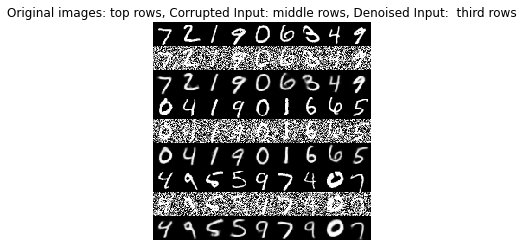

In [ ]:
'''Trains a denoising autoencoder on MNIST dataset.
Denoising is one of the classic applications of autoencoders.
The denoising process removes unwanted noise that corrupted the
true data.
Noise + Data ---> Denoising Autoencoder ---> Data
Given a training dataset of corrupted data as input and
true data as output, a denoising autoencoder can recover the
hidden structure to generate clean data.
This example has modular design. The encoder, decoder and autoencoder
are 3 models that share weights. For example, after training the
autoencoder, the encoder can be used to  generate latent vectors
of input data for low-dim visualization like PCA or TSNE.
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

np.random.seed(1337)

# load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# reshape to (28, 28, 1) and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# generate corrupted MNIST images by adding noise with normal dist
# centered at 0.5 and std=0.5
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

# adding noise may exceed normalized pixel values>1.0 or <0.0
# clip pixel values >1.0 to 1.0 and <0.0 to 0.0
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
latent_dim = 16
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [32, 64]

# build the autoencoder model
# first build the encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs

# stack of Conv2D(32)-Conv2D(64)
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)

# shape info needed to build decoder model so we don't do hand computation
# the input to the decoder's first Conv2DTranspose will have this shape
# shape is (7, 7, 64) which can be processed by the decoder back to (28, 28, 1)
shape = K.int_shape(x)

# generate the latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# instantiate encoder model
encoder = Model(inputs, latent, name='encoder')
encoder.summary()

# build the decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
# use the shape (7, 7, 64) that was earlier saved
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
# from vector to suitable shape for transposed conv
x = Reshape((shape[1], shape[2], shape[3]))(x)

# stack of Conv2DTranspose(64)-Conv2DTranspose(32)
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

# reconstruct the denoised input
outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          padding='same',
                          activation='sigmoid',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

# autoencoder = encoder + decoder
# instantiate autoencoder model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

# Mean Square Error (MSE) loss function, Adam optimizer
autoencoder.compile(loss='mse', optimizer='adam')

# train the autoencoder
autoencoder.fit(x_train_noisy,
                x_train,
                validation_data=(x_test_noisy, x_test),
                epochs=10,
                batch_size=batch_size)

# predict the autoencoder output from corrupted test images
x_decoded = autoencoder.predict(x_test_noisy)

# 3 sets of images with 9 MNIST digits
# 1st rows - original images
# 2nd rows - images corrupted by noise
# 3rd rows - denoised images
rows, cols = 3, 9
num = rows * cols
imgs = np.concatenate([x_test[:num], x_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure()
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('corrupted_and_denoised.png')
plt.show()

In [ ]:
'''Example of VAE on MNIST dataset using MLP
The VAE has a modular design. The encoder, decoder and VAE
are 3 models that share weights. After training the VAE model,
the encoder can be used to  generate latent vectors.
The decoder can be used to generate MNIST digits by sampling the
latent vector from a Gaussian distribution with mean=0 and std=1.
# Reference
[1] Kingma, Diederik P., and Max Welling.
"Auto-encoding variational bayes."
https://arxiv.org/abs/1312.6114

debe compilarse con flags, asi:
python3 vae-mlp-mnist-8.1.1.py --weights=vae_mlp_mnist.tf
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os


# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# z = z_mean + sqrt(var)*eps
def sampling(args):
    """Reparameterization trick by sampling 
        fr an isotropic unit Gaussian.
    # Arguments:
        args (tensor): mean and log of variance of Q(z|X)
    # Returns:
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    # K is the keras backend
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as function 
        of 2-dim latent vector
    # Arguments:
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    xmin = ymin = -4
    xmax = ymax = +4
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z, _, _ = encoder.predict(x_test,
                              batch_size=batch_size)
    plt.figure(figsize=(12, 10))

    # axes x and y ranges
    axes = plt.gca()
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([ymin,ymax])

    # subsample to reduce density of points on the plot
    z = z[0::2]
    y_test = y_test[0::2]
    plt.scatter(z[:, 0], z[:, 1], marker="")
    for i, digit in enumerate(y_test):
        axes.annotate(digit, (z[i, 0], z[i, 1]))
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()


# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary 
# with the TensorFlow backend
z = Lambda(sampling,
           output_shape=(latent_dim,), 
           name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder,
           to_file='vae_mlp_encoder.png',
           show_shapes=True)

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder,
           to_file='vae_mlp_decoder.png', 
           show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    help_ = "Load tf model trained weights"
    parser.add_argument("-w", "--weights", help=help_)
    help_ = "Use binary cross entropy instead of mse (default)"
    parser.add_argument("--bce", help=help_, action='store_true')
    args = parser.parse_args()
    models = (encoder, decoder)
    data = (x_test, y_test)

    # VAE loss = mse_loss or xent_loss + kl_loss
    if args.bce:
        reconstruction_loss = binary_crossentropy(inputs,
                                                  outputs)
    else:
        reconstruction_loss = mse(inputs, outputs)

    reconstruction_loss *= original_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    vae.summary()
    plot_model(vae,
               to_file='vae_mlp.png',
               show_shapes=True)

    save_dir = "vae_mlp_weights"
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    if args.weights:
        filepath = os.path.join(save_dir, args.weights)
        vae = vae.load_weights(filepath)
    else:
        # train the autoencoder
        vae.fit(x_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(x_test, None))
        filepath = os.path.join(save_dir, 'vae_mlp_mnist.tf')
        vae.save_weights(filepath)

    plot_results(models,
                 data,
                 batch_size=batch_size,
                 model_name="vae_mlp")

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_14[0][0]                   
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_14[0][0]                   
____________________________________________________________________________________________

usage: ipykernel_launcher.py [-h] [-w WEIGHTS] [--bce]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-cb6b0596-c090-487b-a375-d4566c14755c.json


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
%tb

UsageError: Line magic function `%td` not found.


## Referencias:
- https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/tree/master/chapter3-autoencoders